In [26]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
#import scikitplot as skl
sns.set()

In [6]:
dta = sm.datasets.fair.load_pandas().data

In [7]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [8]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


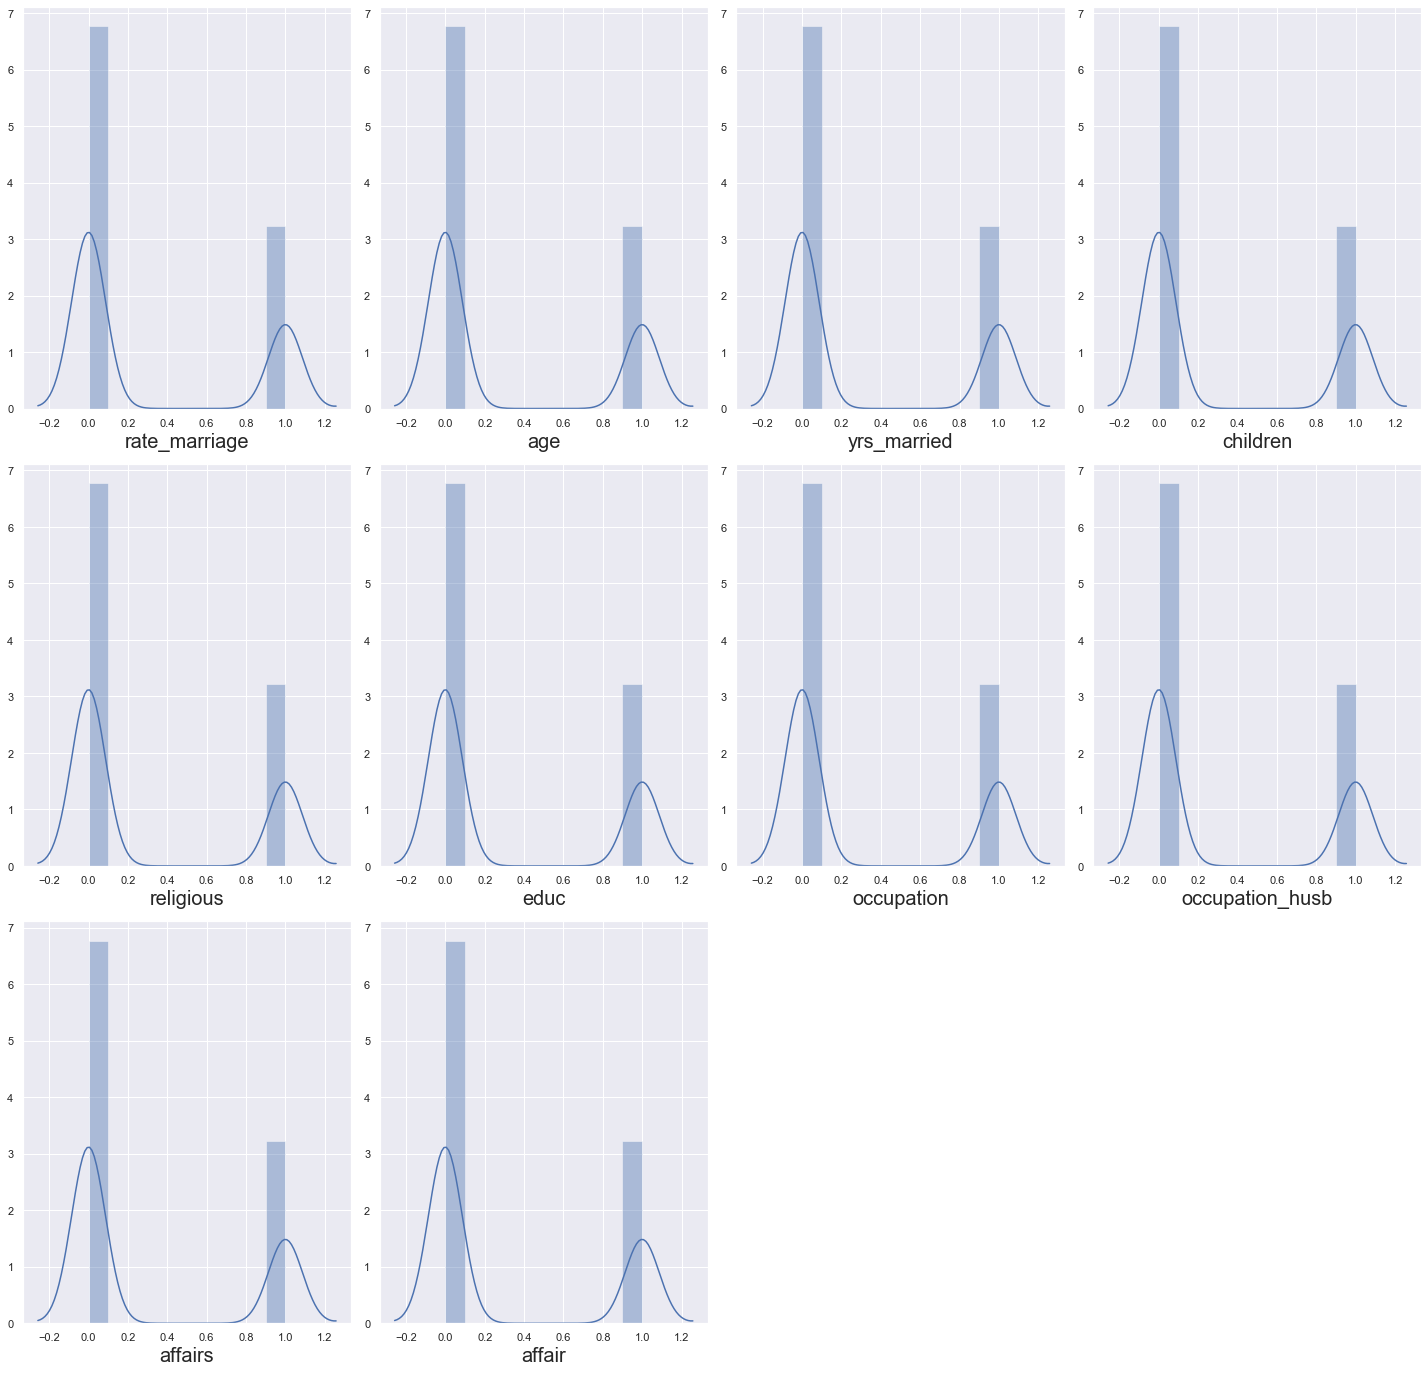

In [50]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dta['affair'])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [33]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")

In [35]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [36]:
y = np.ravel(y)

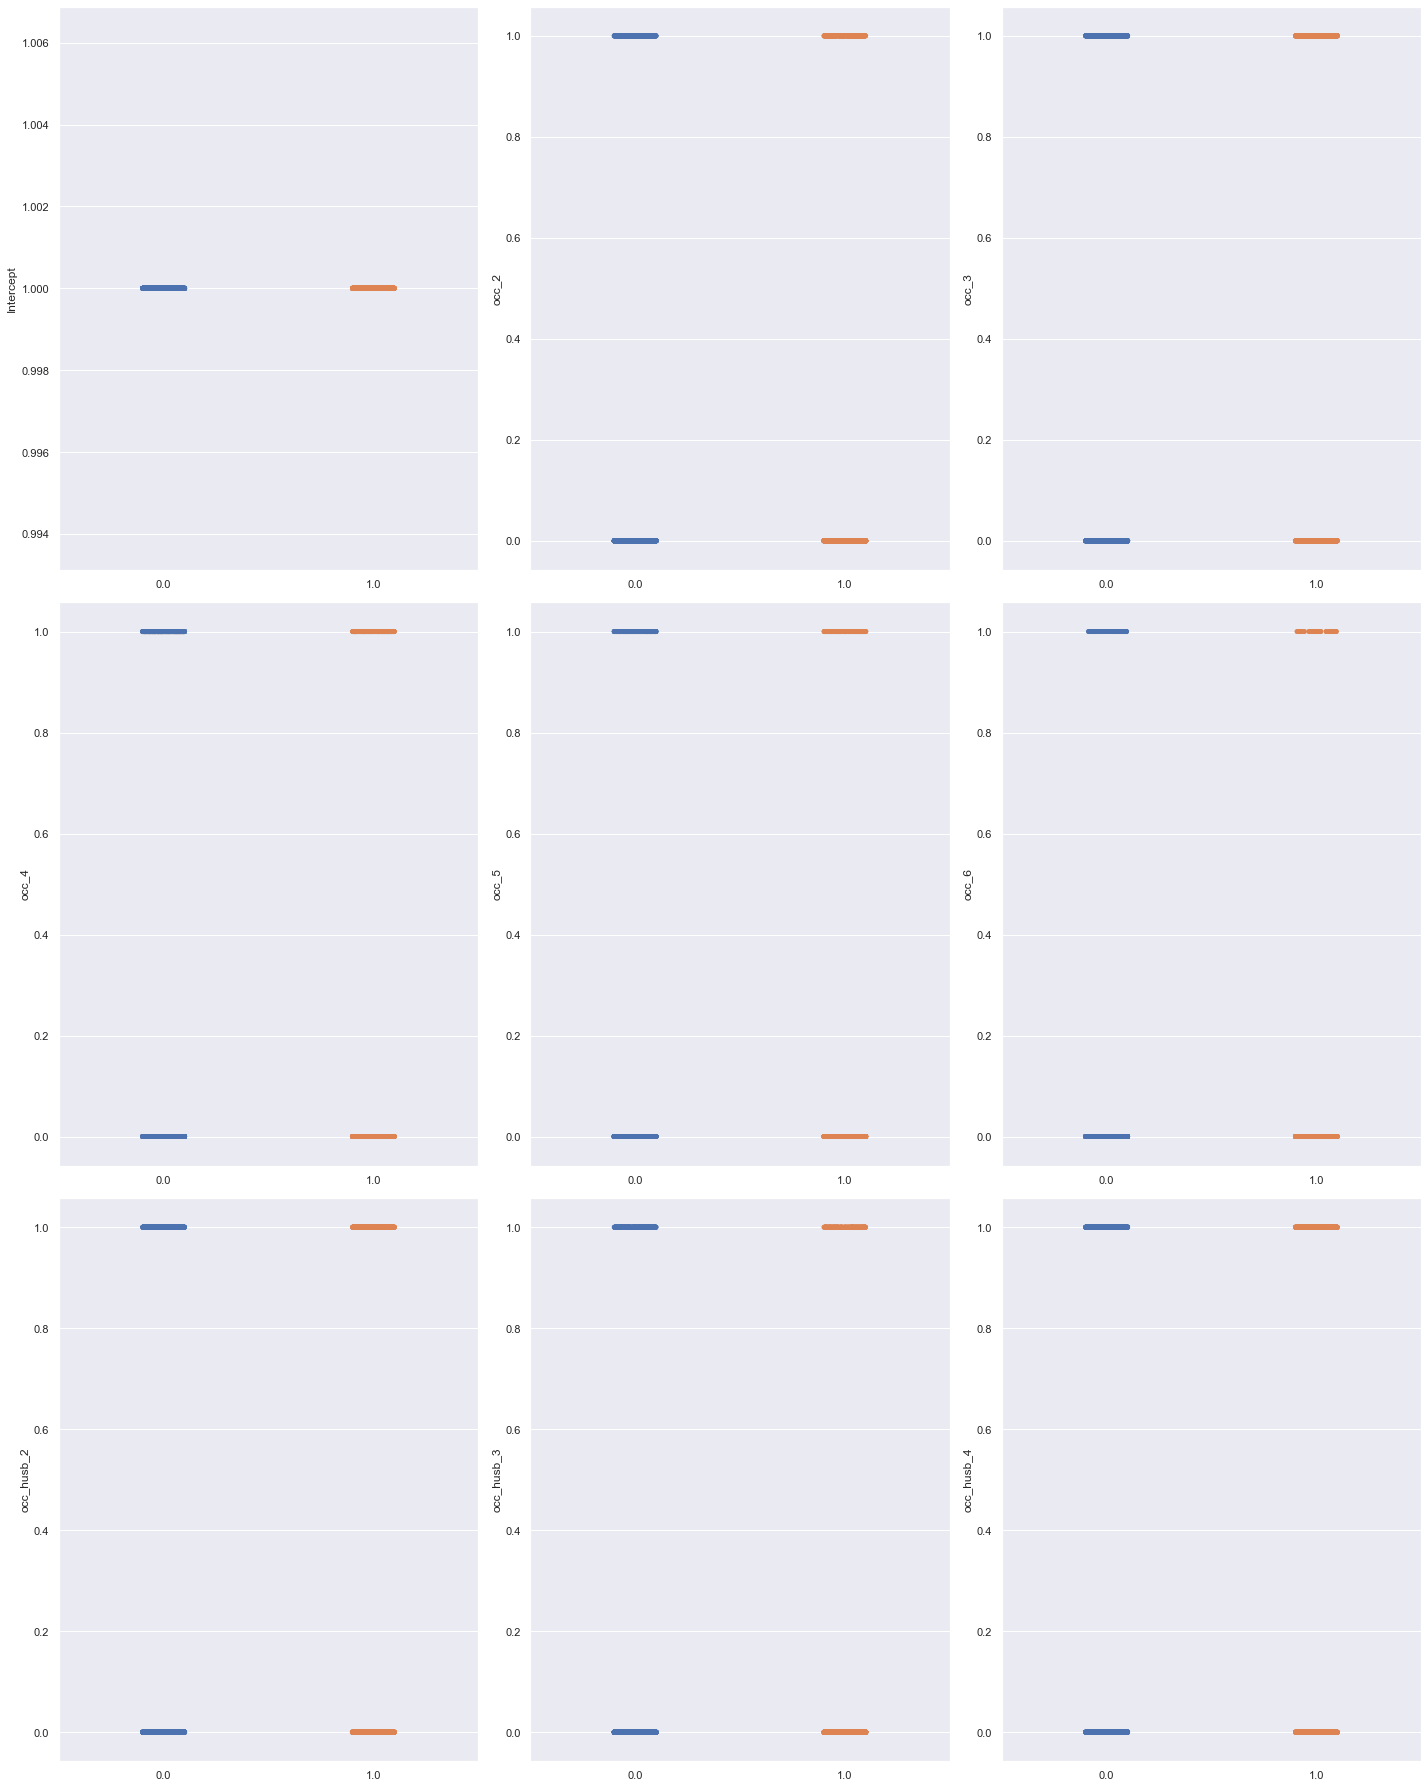

In [37]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [38]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [39]:
X_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [40]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\sysctr78\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [41]:
log_reg = LogisticRegression()

log_reg.fit(X_scaled,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = log_reg.predict(X_scaled)

In [43]:
accuracy = accuracy_score(y,y_pred)
accuracy

0.7260446120012567

In [44]:
# Confusion Matrix
conf_mat = confusion_matrix(y,y_pred)
conf_mat

array([[3887,  426],
       [1318,  735]], dtype=int64)

In [45]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [46]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7260446120012567

In [47]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9012288430326919

In [48]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7467819404418828

In [49]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.816768228619458